# 데이터 전처리
# 언론사별

In [8]:
#-*- coding:utf-8 -*-


import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import re
import pickle
import numpy as np
import pandas as pd

from gensim.models import Word2Vec
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from tqdm import tqdm  # pip install tqdm


import gensim
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import os
#########################
####Preprocessing
#########################



C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [107]:
def clean_text(text):
    '''기사 내용 전처리 함수
    Args:
        - text: str 형태의 텍스트
    Return:
        - text: 전처리된 텍스트'''
    # Common
    # E-mail 제거#
    if isNaN(text):
        return ''
    text = re.sub('([\w\d.]+@[\w\d.]+)', '', text)
    text = re.sub('([\w\d.]+@)', '', text)
    # 괄호 안 제거#
    text = re.sub("<[\w\s\d‘’=/·~:&,`]+>", "", text)
    text = re.sub("\([\w\s\d‘’=/·~:&,`]+\)", "", text)
    text = re.sub("\[[\w\s\d‘’=/·~:&,`]+\]", "", text)
    text = re.sub("【[\w\s\d‘’=/·~:&,`]+】", "", text)
    # 전화번호 제거#
    text = re.sub("(\d{2,3})-(\d{3,4}-\d{4})", "", text)  # 전화번호
    text = re.sub("(\d{3,4}-\d{4})", "", text)  # 전화번호
    # 홈페이지 주소 제거#
    text = re.sub('(www.\w.+)', '', text)
    text = re.sub('(.\w+.com)', '', text)
    text = re.sub('(.\w+.co.kr)', '', text)
    text = re.sub('(.\w+.go.kr)', '', text)
    # 기자 이름 제거#
    text = re.sub("/\w+[=·\w@]+\w+\s[=·\w@]+", "", text)
    text = re.sub("\w{2,4}\s기자", "", text)
    # 한자 제거#
    text = re.sub('[\u2E80-\u2EFF\u3400-\u4DBF\u4E00-\u9FBF\uF900]+', '', text)
    # 특수기호 제거#
    text = re.sub("[◇#/▶▲◆■●△①②③★○◎▽=▷☞◀ⓒ□?㈜♠☎]", "", text)
    # 따옴표 제거#
    text = re.sub("[\"\'”“‘’]", "", text)
    # 2안_숫자제거#
    # text = regex.sub('[0-9]+',"",text)
    text = re.sub("[\[\]]", "", text)
    return text

def nantosen(text):
    if isNaN(text):
        return ''
    return text

def pad_sentences(sentences, sequence_length = 500):
    padded_sentences = []
    for i in tqdm(range(len(sentences))):
        sentence = sentences[i]
        num_padding = sequence_length - len(sentence)
        if num_padding > 0 :
            padd = np.zeros((num_padding,100))
            new_sentence = np.vstack((sentence, padd))
        else :
            new_sentence = sentence[:sequence_length]
        padded_sentences.append(new_sentence)
    return padded_sentences

def isNaN(num):
    return num != num

def npint2int(value):
    if isinstance(value, np.integer):
        value = int(value)
    return value

In [4]:
df = pd.read_excel('D:\data\키워드_통계자료_전문_조국_20190917.xlsx')[['매체종류', '매체그룹', '매체명', '제목', '본문내용', '지면번호', '발행일']]

In [5]:
#df = pd.read_excel('D:\data\키워드_통계자료_전문_조국_20190925.xlsx')[['매체종류', '매체그룹', '매체명', '제목', '본문내용', '지면번호','발행일']]

In [6]:
#df = df[df['발행일']=='2019-09-09']

In [7]:
#del df['발행일']

In [11]:
media = ['조선일보', '동아일보', '한국일보', '문화일보', '중앙일보', '세계일보', '경향신문', '서울신문',
         '매일경제', '국민일보', '서울경제', '한국경제', '한겨레', '내일신문']
#media = ['조선일보', '동아일보', '한국일보', '중앙일보', '세계일보', '경향신문', '국민일보', '한겨레','서울신문']
#media = ['문화일보', '내일신문']
mediakind = ['조간신문', '석간신문']
mediagroup = ['경제지', '중앙지']


In [12]:
df = df[df['매체종류'].isin(mediakind) & df['매체그룹'].isin(mediagroup) & df['매체명'].isin(media) & df['지면번호'].isna()]

In [13]:
df['제목본문'] = (df['본문내용'].apply(nantosen))+(df['제목'].apply(nantosen))  # 기사 내용 전처리


In [657]:
df = df[list(map(lambda x: '장관' in x, df['제목본문']))]


In [ ]:
key_lisit = list(map(lambda x: '장관' in x, df['제목본문'])) 

In [ ]:
key_lisit2 = list(map(lambda x: '후보' in x, df['제목본문']))

In [ ]:
tr_fa = [x or y for x, y in zip(key_lisit, key_lisit2)]

In [ ]:
df = df[tr_fa]

In [658]:
all_df = df

In [692]:
df = df.append(all_df)

In [693]:
all_df = df

In [72]:
xls = pd.ExcelFile('D:\data\조국 1국면(매체별).xlsx')


In [73]:
media = xls.sheet_names


In [70]:
#df = pd.read_excel('D:\data\조국 1국면(매체별).xlsx', sheetname=a[0], header=None)

In [29]:
article_one = df.drop_duplicates(subset=3)  # 중복 기사 제거


# 전처리

In [4]:
import konlpy as kp
import numpy as np
import gensim
import re

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
##네트워크 매트릭스(전체)

from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise_distances



In [6]:
##mecab 사전 가져오기
from konlpy.tag import Mecab
import hanja


In [7]:
path1 = 'D:/data/언론사별_조사_총합/' # R 작업경로

In [8]:
senten_list = []

In [9]:

bannedwords = ['출처','기자','하지','하기','천억','진짜','이것','저것','누구','무엇','그것','위해','역시','이런','저런','그런','무슨',
               '누가','요즘','끼리','가지','정말','보기','하나','이제','어디','라이','아주','바로','자기','그냥','지금',
               '바로','그냥','다른','이번','해주','언제','때문','완전','이건','보고','얼마나','모두','너희','우리','당신','해도','해주',
               '하라','건가','요게','그게','이게','그거','저거','지랄','대가리','이날','오전','관련','동양','입장','오후', '당시', '가능',
               '과정','경우','생각','진행','이상','시작','가운데','정도','이후','내용','주장','확인','공개','일부','준비','대상','부분','핵심',
               '상태','입시','보도','결과','동안','시절','차례','다음','포함','학원','사모','정보','언급','지난','지난달','사이','왼쪽','처음','상대',
               '결국', '직후', '개인','얘기', '대신','여기', '사실', '최근', '전날', '뉴스', '사람', '전문', '본인', '제기']

In [10]:
mecab = Mecab()


In [12]:
#media = ['조선일보', '동아일보', '한국일보', '문화일보', '중앙일보', '세계일보', '경향신문',
#         '매일경제', '국민일보', '서울경제', '한국경제', '한겨레', '내일신문']
#media = ['조선일보', '동아일보', '한국일보', '중앙일보', '세계일보', '경향신문', '국민일보', '한겨레','서울신문']
media = ['조선일보']#['문화일보', '내일신문']
mediakind = ['조간신문', '석간신문']
mediagroup = ['경제지', '중앙지']


In [22]:
#df = all_df

In [23]:
df = df[df['매체종류'].isin(mediakind) & df['매체그룹'].isin(mediagroup) & df['매체명'].isin(media) & df['지면번호'].isna()]

In [24]:
media

['조선일보']

In [167]:
df_two_all = pd.read_excel('D:\data\조국 2국면.xlsx', header=0)

In [169]:
path1 = 'D:/data/언론사별_조사_phase2/'


In [171]:
if not os.path.exists(path1):
        os.makedirs(path1)

In [29]:
df

,매체종류,매체그룹,매체명,제목,본문내용,지면번호,발행일,제목본문
232,조간신문,중앙지,조선일보,"'이영훈 명예훼손'...檢, 조국 피고발사건 수사 착수",홍다영 기자 사법시험 존치를 위한 고시생 모임 관계자들이 지난 8일 서울중앙지검에서...,NaN,2019-08-09,홍다영 기자 사법시험 존치를 위한 고시생 모임 관계자들이 지난 8일 서울중앙지검에서...
854,조간신문,중앙지,조선일보,"고려대도 '최악 동문' 투표...1위는 장하성, 2위 이명박",고성민 기자‘서울대 최악의 동문’ 선정 온라인 투표에서 문재인 정부 초대 청와대 민...,NaN,2019-08-09,고성민 기자‘서울대 최악의 동문’ 선정 온라인 투표에서 문재인 정부 초대 청와대 민...
896,조간신문,중앙지,조선일보,"조국, 이순신 장군 한시 인용 ""'서해맹산'의 정신으로 소명 완수""",9일 개각에서 법무부 장관 후보자로 지명된 조국 전 청와대 민정수석이 이날 오후 서...,NaN,2019-08-09,9일 개각에서 법무부 장관 후보자로 지명된 조국 전 청와대 민정수석이 이날 오후 서...
1078,조간신문,중앙지,조선일보,"與 ""적재적소 개각"" 野 ""국회와 전쟁 선포한 몽니 인사""",조국 법무장관 지명에?與 사법개혁 의지 천명 野 청와대 검찰 만들겠다는 것여야는 9...,NaN,2019-08-09,조국 법무장관 지명에?與 사법개혁 의지 천명 野 청와대 검찰 만들겠다는 것여야는 9...
1118,조간신문,중앙지,조선일보,"檢, 군사독재 시절 '하나회'가 커진 형태...실세 장관 조국, 실세 총장 윤석열과...","오경묵 기자檢 향해 보수적 세계관·엘리트 주의의 권력체검찰 개혁, 법무부 장관이 무...",NaN,2019-08-09,"오경묵 기자檢 향해 보수적 세계관·엘리트 주의의 권력체검찰 개혁, 법무부 장관이 무..."
1213,조간신문,중앙지,조선일보,"통일부, 北조평통 대남 비난에 ""군사공동위 빨리 가동해야""",북한이 지난달 31일 김정은 국무위원장의 지도 하에 신형 대구경조종방사포 시험사격을...,NaN,2019-08-09,북한이 지난달 31일 김정은 국무위원장의 지도 하에 신형 대구경조종방사포 시험사격을...
1380,조간신문,중앙지,조선일보,장관 지명 소감 발표 생방송 알린 조국...청문회서 野와 격돌 예고,윤석열 이어 조국 법무장관...野 檢 장악 현 정권 의지 반영페북에 죽창가 올리는 ...,NaN,2019-08-09,윤석열 이어 조국 법무장관...野 檢 장악 현 정권 의지 반영페북에 죽창가 올리는 ...
1631,조간신문,중앙지,조선일보,[프로필]조국 법무장관 후보자...검찰 불신하는 '검찰 개혁' 법학자,오경묵 기자9일 법무부 장관 후보자로 지명된 조국(54·사진) 서울대 법대 교수는 ...,NaN,2019-08-09,오경묵 기자9일 법무부 장관 후보자로 지명된 조국(54·사진) 서울대 법대 교수는 ...
1906,조간신문,중앙지,조선일보,"文대통령, 법무 조국 등 8개부처 개각",박정엽 기자문재인 대통령이 9일 박상기 법무부장관 후임에 조국 전 청와대 민정수석을...,NaN,2019-08-09,박정엽 기자문재인 대통령이 9일 박상기 법무부장관 후임에 조국 전 청와대 민정수석을...
1944,조간신문,중앙지,조선일보,"송해 ""일본, 부인할 수 없는 이웃이지만 36년 핍박 갚을 수 없어""",원조 국민 MC 송해(본명 송복희?92)가 대한민국 임시정부 수립 100주년을 맞아...,NaN,2019-08-09,원조 국민 MC 송해(본명 송복희?92)가 대한민국 임시정부 수립 100주년을 맞아...


In [30]:
#for media_name in media:
for media_name in media:
    print(media_name)
    df_one = pd.read_excel('D:\data\조국 1국면(매체별).xlsx', sheetname=media_name, header=None)
    #df_two = df_two_all[df_two_all['매체명'].isin([media_name])]
    #if len(df_two) == 0:
    #    print(media_name) 
#        break;
    
    
    #media_name = '서울신문'
    #df_one = df[df['매체명'].isin([media_name])]
    senten_list = []
    senten_list = (df_one[2].apply(nantosen))+(df_one[3].apply(nantosen))
    #senten_list = ((df_two['제목'].apply(nantosen))+(df_two['본문내용'].apply(nantosen)))
    #senten_list = senten_list.append((df_two['제목'].apply(nantosen))+(df_two['본문내용'].apply(nantosen)))
    # 기사 내용 전처리

#     for i in df_one.index:
#         if isNaN(df_one.get_value(i,'제목')):
#             df_one.set_value(i,'제목', '')
#         if isNaN(df_one.get_value(i,'본문내용')):
#             df_one.set_value(i,'본문내용',  '')

#         if df_one.get_value(i,'제목') + df_one.get_value(i,'본문내용') != '':
#             senten_list.append(df_one.get_value(i,'제목') + df_one.get_value(i,'본문내용'))
    
    senten_list = np.reshape(np.array(senten_list),(len(senten_list)))
    

    ##text 전체 명사화
    a=[]
    for i in range(len(senten_list)):
        sen = hanja.translate(senten_list[i], 'substitution')
        b=mecab.nouns(sen)
        a=a+[b]

    ##stopword 제거
    for i in range(len(a)):
        for word in list(a[i]):
            if word in bannedwords:
                a[i].remove(word)

    ##한글자 제거
    for i in range(len(a)): 
        y=a[i]
        a[i]=[n for n in y if len(n)>1]


    ##bigram 생성하기
    bigram = gensim.models.Phrases(b, min_count=5, threshold=50)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    def make_bigram(text):
        return [bigram_mod[doc] for doc in text]
    words_bigram = make_bigram(a)

    ##문장으로 변환
    bb=[' '.join(words_bigram[0])]
    for i in range(1,len(words_bigram)):
        bb=bb+[clean_text(' '.join(words_bigram[i]))]

    bb=[w.replace('인간','사람') for w in bb]
    [re.sub("_", "", x) for x in bb]
    
    article_one = pd.DataFrame(bb, columns=['본문내용'])
    article_one = article_one.dropna()  # NA 제거
    article_one = article_one.drop_duplicates(subset='본문내용')  # 중복 기사 제거
    article_one['본문내용'] = article_one['본문내용'].apply(clean_text)  # 기사 내용 전처리
    article_one['본문내용'] = article_one['본문내용'].replace('', np.nan)
    article_one['본문내용'] = article_one['본문내용'].replace(' ', np.nan)
    article_one['본문내용'] = article_one['본문내용'].replace('  ', np.nan)
    article_one = article_one.dropna()
    
    article_one.to_csv(path1+media_name+'_article.csv', encoding='ansi',index=False)  
    
    bb=article_one['본문내용']
    

    cv = CountVectorizer() #max_features 수정
    tdm = cv.fit_transform(bb) 

    ##TF-IDF
    tfidf = TfidfTransformer()
    tdmtfidf = tfidf.fit_transform(tdm)
    words=cv.get_feature_names() # 단어 추출
    
    # sum tfidf frequency of each term through documents
    sums = tdmtfidf.sum(axis=0)

    # connecting term to its sums frequency
    data = []
    for col, term in enumerate(words):
        data.append( (term, sums[0,col] ))

    tfidftable = pd.DataFrame(data, columns=['키워드','TF-IDF'])
    tfidftable = tfidftable.sort_values('TF-IDF', ascending=False)
    print('전체 글 개수 : ', len(senten_list))
    print('전체 단어 개수 : ', len(words))

    tfidftable.to_csv(path1+media_name+'_tfidf.csv', encoding='ansi',index=False)  

    
    
    tfidftdm=pd.DataFrame(tdmtfidf.T.toarray(), index=words)
    tfidftdm['TF-IDF'] = tfidftdm.sum(axis=1)

    tfidftable = pd.DataFrame(tfidftdm.sort_values('TF-IDF', ascending=False))
    
    tfidfmat = tfidftable.drop('TF-IDF',1)
    distance_matrix=pairwise_distances(tfidfmat, metric='cosine')
    
    
    network_matrix = pd.DataFrame(1-distance_matrix, index = tfidftable.index, columns = tfidftable.index)
    netmat=network_matrix.iloc[0:1000,0:1000]
    netmat.values[[np.arange(len(netmat))]*2] = 0
    del netmat.index.name
    del netmat.columns.name
    netmat.to_excel(path1+media_name+'_netmatgephi.xlsx')

조선일보


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


전체 글 개수 :  1228
전체 단어 개수 :  12568


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:115: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


# Wordcloud

In [9]:
from wordcloud import WordCloud


In [10]:
c_data = pd.DataFrame(data, columns=['키워드','TF-IDF'])
c_data = c_data.sort_values('TF-IDF', ascending=False)


NameError: name 'data' is not defined

In [ ]:
type(c_data)

In [ ]:
keywords = {}

In [11]:
for index, row in c_data[:50].iterrows():
    keywords[row[0]] = row[1]

NameError: name 'c_data' is not defined

In [41]:
font_path = "D:/font/malgun.TTF"

In [42]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 600,
    background_color="white"
)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [43]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

<class 'numpy.ndarray'>
(600, 800, 3)


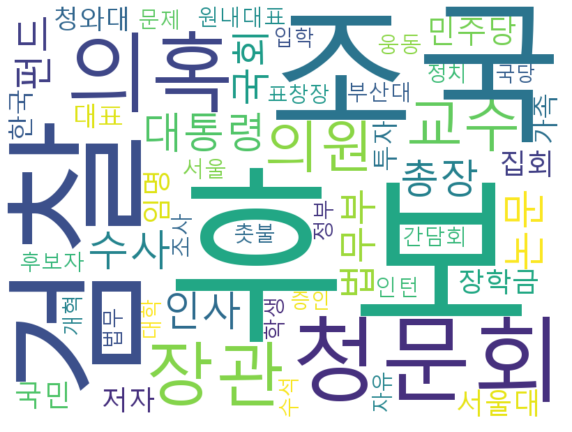

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")

plt.show()
fig.savefig('wordcloud_without_axisoff.png')


In [8]:
path1+'중앙일보_article.csv'

NameError: name 'path1' is not defined

# SNA

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import compress
import copy
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager
import pandas as pd

In [13]:
bb = pd.read_csv(path1+'중앙일보_article.csv', encoding='ansi')

In [14]:
def _calc_centrality(input_g, sort_by):
        """
        상위 노드를 정렬합니다.

        :param by: 정렬을 원하는 방식
            - frequency : 언급 빈도수로 정렬. co-occurrence matrix가 이미 빈도수로 정렬되어있어 별도의 처리x
            - pagerank : pagerank로 중심성이 높은 노드부터 내림차순으로 정렬
            - betwenness : betwennes로 중심성이 높은 노드부터 내림차순으로 정렬
            - weighted_degree : weighted degree로 중심성이 높은 노드부터 내림차순으로 정렬
            - closeness : closeness로 중심성이 높은 노드부터 내림차순으로 정렬
            - eigenvector : eigenvector로 중심성이 높은 노드부터 내림차순으로 정렬

        :return: centrality score of every node
        """

        cent = Centrality(input_g)
        if sort_by == 'frequency':
            score = None
        elif sort_by == 'pagerank':
            score = cent.return_pagerank()
        elif sort_by == 'betwenness':
            score = cent.return_betweenness_centrality()
        elif sort_by == 'weighted_degree':
            score = cent.return_weighted_degree_centrality()
        elif sort_by == 'closeness':
            score = cent.return_closeness_centrality()
        elif sort_by == 'eigenvector':
            score = cent.return_eigenvector_centrality()
        else:
            raise ValueError("잘못된 기준값입니다.")

        if score is not None:
            score = dict(sorted(score.items(), key=lambda x: x[1], reverse=True))

        return score


In [15]:
class Centrality:
    def __init__(self, input_g):
        """
        중심성을 산출하는 클래스입니다.
        :param input_g: nx graph
        """
        self.input_g = input_g

    def return_weighted_degree_centrality(self):
        w_d_centrality = {n: 0.0 for n in self.input_g.nodes()}
        for u, v, d in self.input_g.edges(data=True):
            w_d_centrality[u] += d['weight']
            w_d_centrality[v] += d['weight']
        else:
            return w_d_centrality

    def return_closeness_centrality(self):
        new_g_with_distance = self.input_g.copy()
        for u, v, d in new_g_with_distance.edges(data=True):
            if 'distance' not in d:
                d['distance'] = 1.0 / d['weight']
        return nx.closeness_centrality(new_g_with_distance, distance='distance')

    def return_betweenness_centrality(self):
        return nx.betweenness_centrality(self.input_g, weight='weight')

    def return_pagerank(self):
        return nx.pagerank(self.input_g, weight='weight')

    def return_eigenvector_centrality(self):
        return nx.eigenvector_centrality_numpy(self.input_g, weight='weight')


In [16]:
keyword = '의혹'

In [17]:
articles = bb[list(map(lambda x: keyword in x, bb['본문내용']))]

In [18]:
articles = articles['본문내용']

In [19]:

# CountVectorizer()를 이용한 term-document matrix 생성
vectorizer = CountVectorizer()

In [20]:
# CountVectorizer의 기본 설정: 두글자 이상 단어만 이용
# 한글자 단어도 포함시킬 경우 윗줄 대신 아래 코드를 이용해 vecotrizer를 정의하세요
# vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

X = vectorizer.fit_transform(articles)
# index를 바탕으로 단어를 정렬합니다. 추후 그래프의 node index와 단어를 매칭하는데 이용합니다.
word2idx = dict(sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1]))

In [21]:
word2idx

{'가격': 0,
 '가결': 1,
 '가계': 2,
 '가관': 3,
 '가구': 4,
 '가까이': 5,
 '가나': 6,
 '가난': 7,
 '가늠': 8,
 '가늠자': 9,
 '가닥': 10,
 '가단': 11,
 '가담': 12,
 '가도': 13,
 '가동': 14,
 '가드': 15,
 '가등기': 16,
 '가디언': 17,
 '가라': 18,
 '가락엿': 19,
 '가량': 20,
 '가로등': 21,
 '가로세로': 22,
 '가론': 23,
 '가르고': 24,
 '가르시아': 25,
 '가르침': 26,
 '가리비': 27,
 '가면': 28,
 '가방': 29,
 '가산': 30,
 '가산점': 31,
 '가상': 32,
 '가석방': 33,
 '가설': 34,
 '가세': 35,
 '가속': 36,
 '가속도': 37,
 '가수': 38,
 '가수금': 39,
 '가스': 40,
 '가슴': 41,
 '가습기': 42,
 '가시': 43,
 '가식': 44,
 '가안': 45,
 '가압류': 46,
 '가열': 47,
 '가요': 48,
 '가용': 49,
 '가위': 50,
 '가을': 51,
 '가을장마': 52,
 '가이드': 53,
 '가이드라인': 54,
 '가입': 55,
 '가입자': 56,
 '가자': 57,
 '가장': 58,
 '가재': 59,
 '가정': 60,
 '가정법': 61,
 '가정사': 62,
 '가정집': 63,
 '가정폭력': 64,
 '가족': 65,
 '가족사': 66,
 '가중': 67,
 '가중값': 68,
 '가중치': 69,
 '가즈': 70,
 '가지치기': 71,
 '가짜': 72,
 '가책': 73,
 '가처분': 74,
 '가출': 75,
 '가치': 76,
 '가치관': 77,
 '가칭': 78,
 '가톨릭': 79,
 '가판': 80,
 '가피': 81,
 '가해자': 82,
 '가형': 83,
 '가혹': 84,
 '각계': 85,
 '각계각층': 86,
 '각료': 87,


In [22]:
# co-occurrence matrix 생성 / 단어 빈도수 저장
X[X > 0] = 1  # 한 기사에 단어가 여러번 등장해도 한 번으로 설정(scaling)
co_mat = X.T.dot(X)
word_freq = co_mat.diagonal()
min_max_freq = (word_freq - np.min(word_freq)) / (np.max(word_freq) - np.min(word_freq))  # min-max normalize
word2freq = {w: min_max_freq[i] for w, i in word2idx.items()}
co_mat.setdiag(0)

In [23]:
sort_by = 'closeness'

In [24]:
# 최소 등장 횟수 아래로 등장한 단어를 제외하고 co-occurrence matrix를 새롭게 생성
# 상위 키워드로 정렬하는 경우 min_count를 50으로 설정
if sort_by != 'frequency':
    min_count = 50  # 최소 min_count (0으로 설정할 시 너무 오래 걸리는 issue 존재)
co_mat = co_mat.multiply(co_mat > min_count)
nonzero_idx = co_mat.getnnz(0) > 0  # 영벡터를 제외하고 공기행렬을 새롭게 정의
co_mat = co_mat[nonzero_idx][:, nonzero_idx]
label = zip(range(len(nonzero_idx)), list(compress(word2idx.keys(), nonzero_idx)))
_idx2label = {i: w for i, w in label}
# co-occurrence matrix의 index 별 word frequency
word_frequency = np.array([word2freq[w] for w in _idx2label.values()])

# build

In [25]:
G = nx.from_scipy_sparse_matrix(co_mat)
score = _calc_centrality(G, sort_by)


In [26]:
top_n = 20
most_freq = 3

In [27]:
if sort_by != 'frequency':
    remove_idx = list(score.keys())[top_n:]
    G.remove_nodes_from(remove_idx)
    # 연관 단어 저장
    related_words = [_idx2label[i] for i in list(score.keys())[:top_n]]
    # 제거된 노드에 맞게 index 재 정렬
    _idx2label = {i: w for i, w in _idx2label.items() if i in list(G.node)}
    word_frequency = word_frequency[list(G.node)]
else:
    # 연관 단어 저장
    related_words = tuple(list(_idx2label.values())[i] for i in np.argsort(-word_frequency))

In [28]:
pos = nx.kamada_kawai_layout(G) #layout


In [29]:
# edge 두께 설정
weights = [G[u][v]['weight'] for u, v in G.edges()]
# 엣지 두께의 차이가 너무 커 min-max scaling에서 max 대신 75 percentile 이용
tmp_max = np.percentile(weights, 75)
weights_normalized = (weights - np.min(weights)) / (tmp_max - np.min(weights) + 1e-9) + 0.2  # 0.2:보정값

# 검색 기록에 따라 연관 단어 index 변화
# ex) 첫 검색 : 남양유업 => 남양유업을 제외하고 1번 index부터 연관 검색어 지정
# ex) 두번째 검색 : 소비자 => 남양유업, 소비자를 제외하고 2번 index부터 연관 검색어 지정
# ex) 수정-> 무조건 키워드만 제거(한개씩)
print(np.asarray(related_words).shape)



(20,)


In [30]:
if keyword in related_words:
    related_words = list(related_words)
    related_words.remove(keyword)
    related_words = tuple(related_words)
n_related_words = related_words[:most_freq + 1]
print(most_freq)
print(related_words)
print(np.asarray(n_related_words).shape)

3
('조국', '장관', '법무부', '후보', '서울', '인사', '검찰', '청문회', '국회', '수사', '교수', '국민', '의원', '자유', '문제', '가족', '국당', '대표', '연합뉴스')
(4,)


In [31]:
state = {} 

In [32]:
state['graph'] = G
state['label'] = _idx2label
state['word_frequency'] = word_frequency
state['position'] = pos
state['weights_normalized'] = weights_normalized
state['most_related_words'] = n_related_words


In [33]:
co_mat.astype('int') 

<719x719 sparse matrix of type '<class 'numpy.int32'>'
	with 27188 stored elements in Compressed Sparse Column format>

# draw graph

In [34]:
kor_font_path = "D:/font/malgun.TTF"

In [35]:
font_name = font_manager.FontProperties(fname=kor_font_path).get_name()
plt.rc('font', family=font_name)

# 일정 수준 이상 등장했으면 edge를 빨간색으로(임의로 0.9 quantile 설정)
threshold = np.quantile(state['weights_normalized'], 0.95)
edge_colors = ['crimson' if w > threshold else 'dimgray' for w in state['weights_normalized']]

plt.figure(figsize=(10, 10))

# colormap을 밝게 조절
cmap_custom = ListedColormap(plt.cm.Blues(np.arange(plt.cm.Blues.N)[:-100]))


<Figure size 720x720 with 0 Axes>

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


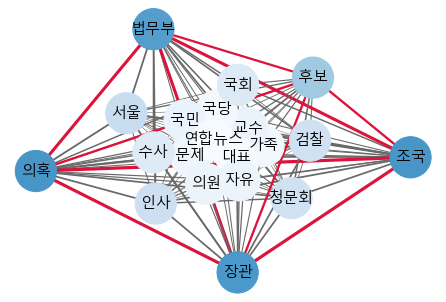

In [36]:
nx.draw(state['graph'],
        state['position'],
        node_size=1700,
        node_color=state['word_frequency'],
        edge_color=edge_colors,
        width=state['weights_normalized'],
        labels=state['label'],
        cmap=cmap_custom,
        font_size=15,
        font_family=font_name)


In [37]:
state['label']

{2: '가족',
 30: '검찰',
 75: '교수',
 84: '국당',
 86: '국민',
 89: '국회',
 162: '대표',
 196: '문제',
 236: '법무부',
 298: '서울',
 320: '수사',
 383: '연합뉴스',
 433: '의원',
 436: '의혹',
 454: '인사',
 477: '자유',
 482: '장관',
 532: '조국',
 610: '청문회',
 715: '후보'}

In [38]:
state['graph']

In [39]:
state['position']

{2: array([0.22356074, 0.00205054]),
 30: array([0.46921351, 0.04206231]),
 75: array([0.14013411, 0.13799479]),
 84: array([-0.02403303,  0.27327741]),
 86: array([-0.1935362 ,  0.19863513]),
 89: array([0.08915557, 0.47247631]),
 162: array([ 0.0801784 , -0.08574394]),
 196: array([-0.16213875, -0.07347437]),
 236: array([-0.35753808,  0.90219161]),
 298: array([-0.50086324,  0.25373365]),
 320: array([-0.35800469, -0.04875652]),
 383: array([-0.04279686,  0.04822024]),
 433: array([-0.07958109, -0.29129491]),
 436: array([-0.97850343, -0.19206476]),
 454: array([-0.34541466, -0.44307072]),
 477: array([ 0.09684138, -0.26362848]),
 482: array([ 0.08701202, -0.97426533]),
 532: array([ 1.        , -0.08616989]),
 610: array([ 0.37149488, -0.40064263]),
 715: array([0.48481941, 0.52846957])}

# pyvis

In [234]:
from pyvis.network import Network


In [238]:
def draw_graph3(networkx_graph,notebook=True,output_filename='ex.html',show_buttons=True,only_physics_buttons=False):

    pyvis_graph = Network()
    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(node,**node_attrs)

    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        edge_attrs['weight'] = npint2int(edge_attrs['weight'])
        edge_attrs['value'] = npint2int(edge_attrs['value'])

        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['weight'] = npint2int(edge_attrs['weight'])
            edge_attrs['value']=edge_attrs['weight']
        # add the edge
        source = npint2int(source)
        target = npint2int(target)
        pyvis_graph.add_edge(source,target,**edge_attrs)
        
    

    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()

    # return and also save
    return pyvis_graph.show(output_filename)


In [239]:
draw_graph3(state['graph'],notebook=False)

# 매트릭스

In [148]:
network_matrix.shape

(14233, 14233)

In [125]:

network_matrix = pd.DataFrame(1-distance_matrix, index = tfidftable.index, columns = tfidftable.index)
netmat=network_matrix.iloc[0:1000,0:1000]
netmat.values[[np.arange(len(netmat))]*2] = 0
del netmat.index.name
del netmat.columns.name
path2 = 'C:/Users/user/Desktop/'
netmat.to_excel(path1+_media+'_netmatgephi.xlsx')

NameError: name 'distance_matrix' is not defined

# Data

In [1]:
import time
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import config
from sklearn.externals import joblib
from CNN_Model import CNN
import sys

from gensim.models import KeyedVectors

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from torch.utils.data import DataLoader, TensorDataset

def softmax(z):
    return (torch.exp(z.t()) / torch.sum(torch.exp(z), dim=1)).t()

In [7]:

word2vec_path = 'D:/data/ko_w2v_100d_min50_sg_bodototal'
w2v_model = Word2Vec.load(word2vec_path)  # Pre
w2v_words = w2v_model.wv.index2word


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [46]:
#media = ['조선일보', '동아일보', '한국일보', '중앙일보', '세계일보', '경향신문', '국민일보', '한겨레','서울신문', '문화일보', '내일신문']

In [47]:
media_name

'조선일보'

In [65]:
for media_name in media:
    print(media_name)
    df = pd.read_csv(path1+media_name+'_article.csv', encoding='ansi')
    #print(df)


조선일보
중앙일보
동아일보
한겨레신문
경향신문
한국일보
서울신문
국민일보
세계일보
문화일보
내일신문


In [178]:
path1 = 'D:/data/언론사별_조사_총합/'

In [179]:
for media_name in media:
    print(media_name)
    df = pd.read_csv(path1+media_name+'_article.csv', encoding='ansi')

    corpus = df['본문내용'].tolist()
    

    texts_in_w2v = []
    null_indices = []
    for idx, text in enumerate(tqdm(corpus)):
        text = [f'{word}_{pos}' for word, pos in mecab.pos(text)]
        if text:
            texts_in_w2v.append(text)
        elif not text:
            null_indices.append(idx)
        
    

    # 없는 단어는 제외
    '''For Classification'''
    final_data_setence = []
    for i in tqdm(range(len(texts_in_w2v))) :
        tmp_sentence = []
        not_lists = []
        for j in range(len(texts_in_w2v[i])) :
            tmp = texts_in_w2v[i][j]
            try :
                tmp_sentence.append(w2v_model[tmp])
            except  :
                pass
        final_data_setence.append(np.array(tmp_sentence))

    #final_data_setence3 = pad_sentences(final_data_setence)
    #data_sentence =0
    sequence_length=500
    padded_sentences = []
    for i in tqdm(range(len(final_data_setence))):
        sentence = final_data_setence[i]
        num_padding = sequence_length - len(sentence)
        try:
            if num_padding > 0 :
                padd = np.zeros((num_padding,100))
                new_sentence = np.vstack((sentence, padd))
            else :
                new_sentence = sentence[:sequence_length]
            padded_sentences.append(new_sentence)
        except:
            continue
            
    final_data_setence = pad_sentences(final_data_setence, sequence_length = 500)
    
    filename =path1+media_name+'_xdata.csv'
    
    joblib.dump(final_data_setence, filename=filename)


    print('total_for_visualization_done')

    x_test = np.array(final_data_setence, dtype=float)
    y_test = np.zeros(x_test.shape[0], dtype=float)
    del final_data_setence


    print('--------------Data Loading Done------------')

    use_cuda = torch.cuda.is_available()
    print('use_cuda = {}\n'.format(use_cuda))

    device = torch.device('cpu')
    model = CNN(config.embedding_dim, config.num_filters, kernel_size=config.kernel_sizes, stride=1)
    model.load_state_dict(torch.load('D:/data/trained_model_bodototal.pth'))
    model.to(device)
    model.eval()

    # test
    dataset_test = TensorDataset(torch.from_numpy(x_test), torch.from_numpy(y_test))
    test_loader = DataLoader(dataset_test, batch_size=config.batch_size, shuffle=False, num_workers=0,
                             pin_memory=False)
    total_pred = np.array([])

    for i, (inputs, _) in enumerate(test_loader):
        if use_cuda:
            inputs = inputs.float().cuda()
        else:
            inputs = inputs.float()  # .cuda()
        preds, _, = model(inputs)
        preds = preds.cpu()
        tmp = softmax(preds)
        tmp = tmp.detach().numpy()
        total_pred = np.append(total_pred, tmp)
    total_pred = total_pred.reshape((-1, config.output_size))

    # performance
    '''성능 평가'''
    total_pred = np.argmax(total_pred, axis=1)
    #return total_pred

    print(media_name + '\n' + str(sum(total_pred==0)) + ' ' + str(sum(total_pred==1)) + ' ' + str(sum(total_pred==2)))

조선일보


100%|████████████████████████████████████████████████████████████████████████████| 2130/2130 [00:00<00:00, 6673.61it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

조선일보
1131 990 9
중앙일보


100%|████████████████████████████████████████████████████████████████████████████| 2263/2263 [00:00<00:00, 6409.77it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

중앙일보
1129 1122 12
동아일보


100%|████████████████████████████████████████████████████████████████████████████| 3296/3296 [00:00<00:00, 6212.07it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

동아일보
1888 1391 17
한겨레


100%|██████████████████████████████████████████████████████████████████████████████| 760/760 [00:00<00:00, 6350.30it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

한겨레
367 391 2
경향신문


100%|████████████████████████████████████████████████████████████████████████████| 1148/1148 [00:00<00:00, 6256.44it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

경향신문
580 565 3
한국일보


100%|████████████████████████████████████████████████████████████████████████████| 1344/1344 [00:00<00:00, 6238.87it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

한국일보
703 636 5
서울신문


100%|████████████████████████████████████████████████████████████████████████████| 1571/1571 [00:00<00:00, 6152.57it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

서울신문
874 689 8
국민일보


100%|████████████████████████████████████████████████████████████████████████████| 1761/1761 [00:00<00:00, 5965.24it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

국민일보
976 772 13
세계일보


100%|████████████████████████████████████████████████████████████████████████████| 2627/2627 [00:00<00:00, 6393.28it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

세계일보
1497 1125 5
문화일보


100%|██████████████████████████████████████████████████████████████████████████████| 946/946 [00:00<00:00, 6002.43it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

문화일보
473 471 2
내일신문


100%|██████████████████████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 6211.01it/s]


total_for_visualization_done
--------------Data Loading Done------------
use_cuda = False

내일신문
210 168 0
